# Neural Network
## Using Principal Component Analysis
### Using (x-mean)/std normalization

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# import keras
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical
from keras import regularizers

Using TensorFlow backend.


In [2]:
# Reading the csv dataset
eeg_raw = pd.read_csv(r'Dataset/one_to_five.csv')

In [3]:
# Previewing the imported dataset
eeg_raw

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Unnamed: 180
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-15,-31,-77,-103,-127,-116,-83,-51,4,Healthy Patient EEG with Eyes Close
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,150,146,152,157,156,154,143,129,1,Recording of seizure activites
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,64,48,19,-12,-30,-35,-35,-36,5,Healthy Patient EEG with Eyes Open
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-81,-80,-77,-85,-77,-72,-69,-65,5,Healthy Patient EEG with Eyes Open
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,2,-12,-32,-41,-65,-83,-89,-73,5,Healthy Patient EEG with Eyes Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,16,12,5,-1,-18,-37,-47,-48,2,Epilepsy Patient EEG from Tumour region
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-33,-7,14,27,48,77,117,170,1,Recording of seizure activites
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-48,-61,-62,-67,-30,-2,-1,-8,5,Healthy Patient EEG with Eyes Open
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,135,148,143,116,86,68,59,55,3,Epilepsy Patient EEG from Healthy region


In [4]:
# dropping 'y' & 'Unnamed: 180' columns
eeg_raw_drop_out = eeg_raw.drop(['y','Unnamed: 180' ], axis = 1)

# dropping 'Unnamed: 0' column
eeg_raw_drop_io = eeg_raw_drop_out.drop(['Unnamed: 0'], axis = 1)

In [5]:
# previewing dataset after dropping required columns
eeg_raw_drop_io

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


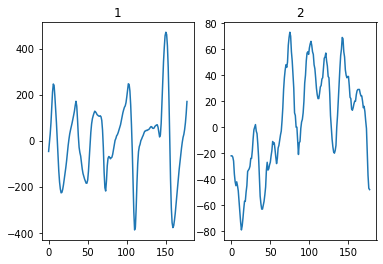

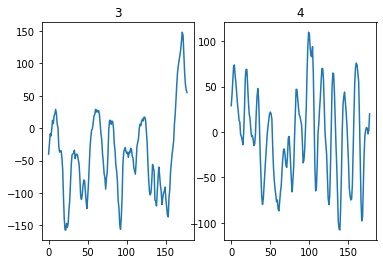

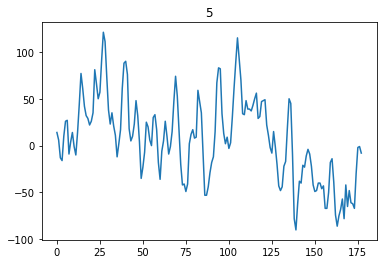

In [6]:
# 1 = An Epileptic Waveform
# 2,3,4,5 = A Non-Epileptic Waveform
plt.subplot(1,2,1)
plt.title('1')
plt.plot(range(178),eeg_raw_drop_io.iloc[11496,0:178])

plt.subplot(1,2,2)
plt.title('2')
plt.plot(range(178),eeg_raw_drop_io.iloc[11495,0:178])
plt.show()

plt.subplot(1,2,1)
plt.title('3')
plt.plot(range(178),eeg_raw_drop_io.iloc[11498,0:178])

plt.subplot(1,2,2)
plt.title('4')
plt.plot(range(178),eeg_raw_drop_io.iloc[11499,0:178])
plt.show()

plt.subplot(1,1,1)
plt.title('5')
plt.plot(range(178),eeg_raw_drop_io.iloc[11497,0:178])
plt.show()

In [7]:
# Normalization
mean = np.mean(eeg_raw_drop_io, axis = 0)
std = np.std(eeg_raw_drop_io, axis = 0)
norm_input = (eeg_raw_drop_io - mean)/std

In [8]:
norm_input

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-0.062907,-0.066777,-0.078358,-0.104531,-0.173862,-0.216936,-0.238435,-0.217830,-0.237258,-0.266981,...,0.178534,0.152726,0.166305,0.147991,0.110762,0.073921,-0.030170,-0.149150,-0.212268,-0.217200
11496,-0.213856,-0.000533,0.233536,0.534181,0.925578,1.351359,1.563860,1.521707,1.231639,0.886175,...,-0.511420,-0.333165,-0.128622,0.035263,0.164159,0.241335,0.371696,0.550714,0.794613,1.105255
11497,0.154459,0.101845,-0.017202,-0.042521,0.111868,0.204582,0.207494,-0.014267,0.065162,0.125715,...,-0.196704,-0.333165,-0.218906,-0.285123,-0.286748,-0.320698,-0.103237,0.065721,0.070150,0.025452
11498,-0.171590,-0.084843,0.007260,-0.017716,0.037330,0.117799,0.083625,0.158453,0.176255,0.219214,...,0.747443,0.796533,0.882557,0.954889,0.929514,0.773473,0.603073,0.495462,0.438521,0.407630


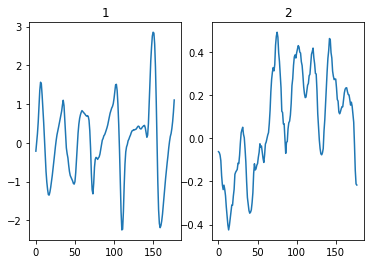

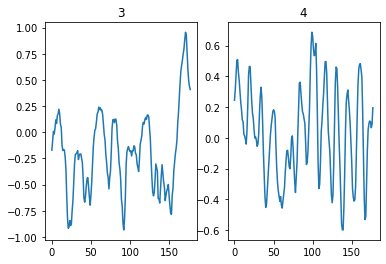

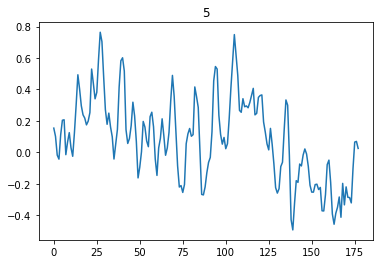

In [9]:
# 1 = An Epileptic Normalized Waveform
# 2,3,4,5 = A Non-Epileptic Normalized Waveform
plt.subplot(1,2,1)
plt.title('1')
plt.plot(range(178),norm_input.iloc[11496,0:178])

plt.subplot(1,2,2)
plt.title('2')
plt.plot(range(178),norm_input.iloc[11495,0:178])
plt.show()

plt.subplot(1,2,1)
plt.title('3')
plt.plot(range(178),norm_input.iloc[11498,0:178])

plt.subplot(1,2,2)
plt.title('4')
plt.plot(range(178),norm_input.iloc[11499,0:178])
plt.show()

plt.subplot(1,1,1)
plt.title('5')
plt.plot(range(178),norm_input.iloc[11497,0:178])
plt.show()

In [10]:
# Preparing Output

# classes = ['Recording of seizure activites','Healthy Patient EEG from Tumour region','Healthy Patient EEG from Healthy region','Healthy Patient EEG with Eyes Close','Healthy Patient EEG with Eyes Open']
raw_y = eeg_raw['y']
targ = pd.DataFrame(list(zip(raw_y)),columns=['one_hot_y'])
# Converting classes into one_hot encoded
target = pd.get_dummies(targ.one_hot_y)
# previewing the one_hot encoded result
target

,1,2,3,4,5
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
11495,0,1,0,0,0
11496,1,0,0,0,0
11497,0,0,0,0,1
11498,0,0,1,0,0


In [11]:
# converting input and target into array
norm_input_array = np.array(norm_input)
target_array = np.array(target)
raw_y_array = np.array(raw_y)

In [12]:
norm_input_array

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [13]:
target_array

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [14]:
print("Input Shape: ", norm_input_array.shape)
print("Output Shape: ", target_array.shape)
print("Output Shape_Y: ", raw_y_array.shape)
print("Input Datatype: ", norm_input_array.dtype)
print("Output Datatype: ", target_array.dtype)
print("Output Datatype: ", raw_y_array.dtype)

Input Shape:  (11500, 178)
Output Shape:  (11500, 5)
Output Shape_Y:  (11500,)
Input Datatype:  float64
Output Datatype:  uint8
Output Datatype:  int64


In [15]:
# Shuffle the dataset
x, y, ry = shuffle(norm_input_array, target_array, raw_y_array)

# Splitting x and y, X = 60%, Y = 60%
X_train, x_test = train_test_split(x, test_size = 0.4, shuffle = False)
Y_train, y_test = train_test_split(y, test_size = 0.4, shuffle = False)
RY_train, ry_test = train_test_split(ry, test_size = 0.4, shuffle = False)

# Splitting X_test and Y_test into 20% of the overall dataset  
X_cv, X_test = train_test_split(x_test, test_size = 0.5, shuffle = False)
Y_cv, Y_test = train_test_split(y_test, test_size = 0.5, shuffle = False)
RY_cv, RY_test = train_test_split(ry_test, test_size = 0.5, shuffle = False)

In [16]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("Raw_Y_train shape: ", RY_train.shape)
print("X_cv shape: ", X_cv.shape)
print("Y_cv shape: ", Y_cv.shape)
print("Raw_Y_cv shape: ", RY_cv.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)
print("Raw_Y_test shape: ", RY_test.shape)

X_train shape:  (6900, 178)
Y_train shape:  (6900, 5)
Raw_Y_train shape:  (6900,)
X_cv shape:  (2300, 178)
Y_cv shape:  (2300, 5)
Raw_Y_cv shape:  (2300,)
X_test shape:  (2300, 178)
Y_test shape:  (2300, 5)
Raw_Y_test shape:  (2300,)


In [17]:
# Initialize PCA
pca = PCA(n_components = 100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_cv_pca = pca.transform(X_cv)

In [38]:
'''
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(178,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
print('Network Architecture Defined')
'''
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(100,)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu',))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))
print('Network Architecture Defined')

'''model = Sequential()
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(100,)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))
print('Network Architecture Defined')'''

Network Architecture Defined


"model = Sequential()\nmodel.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(100,)))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l1(0.001)))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dense(5, activation='softmax'))\nprint('Network Architecture Defined')"

In [39]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])
print('model is now ready to use')

model is now ready to use


In [40]:
history = model.fit(X_train_pca, Y_train, 
                    batch_size = 128, epochs = 6,
         verbose = 1, validation_data = (X_cv_pca, Y_cv))

Train on 6900 samples, validate on 2300 samples
Epoch 1/6
6900/6900 [==============================] - 14s 2ms/step - loss: 1.3657 - accuracy: 0.3520 - val_loss: 1.1136 - val_accuracy: 0.5296
Epoch 2/6
6900/6900 [==============================] - 12s 2ms/step - loss: 1.0667 - accuracy: 0.5335 - val_loss: 0.8768 - val_accuracy: 0.6109
Epoch 3/6
6900/6900 [==============================] - 12s 2ms/step - loss: 0.8840 - accuracy: 0.6078 - val_loss: 0.7875 - val_accuracy: 0.6478
Epoch 4/6
6900/6900 [==============================] - 12s 2ms/step - loss: 0.7597 - accuracy: 0.6572 - val_loss: 0.7309 - val_accuracy: 0.6726
Epoch 5/6
6900/6900 [==============================] - 12s 2ms/step - loss: 0.6838 - accuracy: 0.6954 - val_loss: 0.6962 - val_accuracy: 0.6891
Epoch 6/6
6900/6900 [==============================] - 12s 2ms/step - loss: 0.6369 - accuracy: 0.7123 - val_loss: 0.6598 - val_accuracy: 0.7135


In [41]:
score = model.evaluate(X_test_pca, Y_test, verbose =1)

2300/2300 [==============================] - 2s 821us/step


In [42]:
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.6579192126315573
Test accuracy:  0.7017391324043274


In [43]:
pred = model.predict(X_test_pca)

In [44]:
# invert
invert = pred.argmax(1)

In [45]:
print(pred.shape)
print(RY_test.shape)
print(invert.shape)

(2300, 5)
(2300,)
(2300,)


In [46]:
print(pred[0])
print(invert[0])

[9.7516125e-01 2.3439640e-02 1.3986340e-03 6.1306167e-07 7.3265943e-10]
0


In [47]:
print(confusion_matrix(RY_test, invert))
print(confusion_matrix(RY_test, invert, normalize = 'true'))
print(classification_report(RY_test, invert))

[[  0   0   0   0   0   0]
 [443  14   2   6   0   0]
 [ 19 182 219   2  44   0]
 [  7 111 288  11  29   0]
 [  1   3   5 343 109   0]
 [  0   8  45  51 358   0]]
[[0.         0.         0.         0.         0.         0.        ]
 [0.95268817 0.03010753 0.00430108 0.01290323 0.         0.        ]
 [0.04077253 0.39055794 0.46995708 0.00429185 0.0944206  0.        ]
 [0.01569507 0.24887892 0.64573991 0.02466368 0.06502242 0.        ]
 [0.0021692  0.00650759 0.01084599 0.74403471 0.23644252 0.        ]
 [0.         0.01731602 0.0974026  0.11038961 0.77489177 0.        ]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.04      0.03      0.04       465
           2       0.39      0.47      0.43       466
           3       0.03      0.02      0.03       446
           4       0.20      0.24      0.22       461
           5       0.00      0.00      0.00       462

    accuracy                           0.1

C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Miniconda3\envs\tf\li

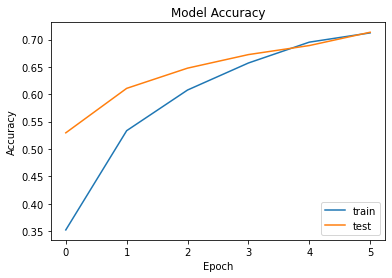

In [48]:
#plt.subplot(no._row, no_column, plot_number)
plt.subplot(1,1,1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')

In [49]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(RY_test, invert)
AUC = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label = 'Keras Model(area = {:.3f})'.format(AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ValueError: multiclass format is not supported

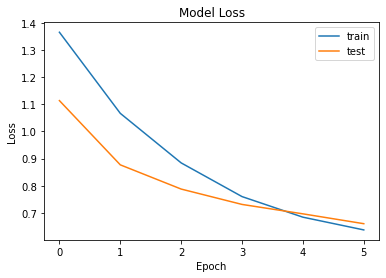

In [50]:
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')

In [51]:
model.save('1c_NN_PCA.h5')